In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
###Read in data csv file and choose which columns we want to be included###

evict = pd.read_csv("data/Eviction_Notices.csv", engine='python', on_bad_lines='skip')
evict.dropna()
    
bad_reasons = evict[['Eviction ID', 'Address','File Date', 'Non Payment', 'Nuisance', 'Illegal Use', 'Unapproved Subtenant', 'Demolition', 'Ellis Act WithDrawal', 'Late Payments', 'Failure to Sign Renewal']]
bad_reasons.head(25)

,Eviction ID,Address,File Date,Non Payment,Nuisance,Illegal Use,Unapproved Subtenant,Demolition,Ellis Act WithDrawal,Late Payments,Failure to Sign Renewal
0,M222138,400 Block Of Eddy Street,12/12/2022,False,True,False,False,False,False,False,False
1,M211838,900 Block Of Bush Street,12/06/2021,False,True,False,False,False,False,False,False
2,M222033,1000 Block Of Pine Street,11/14/2022,False,False,False,False,False,False,False,False
3,M221840,100 Block Of Caine Avenue,10/18/2022,False,False,False,False,False,False,False,False
4,M120930,1900 Block Of Jefferson Street,06/21/2012,False,False,False,False,False,False,False,False
5,M221228,400 Block Of Eddy Street,08/11/2022,False,False,False,False,False,False,False,False
6,M221006,700 Block Of Bush Street,07/06/2022,False,True,False,False,False,False,False,False
7,M220692,1700 Block Of Mission Street,05/02/2022,False,False,False,False,False,False,False,False
8,M220284,2000 Block Of Broadway Street,02/18/2022,False,False,False,False,False,False,False,False
9,M220046,100 Block Of San Carlos Street,01/07/2022,False,False,False,False,False,False,False,False


In [3]:
###same as last cell, just include which neighborhoods they were in. however, some neighborhoods were NaN so we dropped those values and got a different graph###

bad_reasons_with_neighborhood = evict[['Eviction ID', 'Address','File Date', 'Non Payment', 'Nuisance', 'Illegal Use', 'Unapproved Subtenant', 'Demolition', 'Ellis Act WithDrawal', 'Late Payments', 'Failure to Sign Renewal', 'Neighborhoods - Analysis Boundaries']]

sampled = bad_reasons_with_neighborhood.sample(5000).rename({'Neighborhoods - Analysis Boundaries': 'Neighborhoods'}, axis=1)
sampled.head(20)

,Eviction ID,Address,File Date,Non Payment,Nuisance,Illegal Use,Unapproved Subtenant,Demolition,Ellis Act WithDrawal,Late Payments,Failure to Sign Renewal,Neighborhoods
81273,S000021,1600 Block Of Clay Street,08/04/1997,False,False,False,False,False,False,False,False,Russian Hill
36572,RE01245,700 Block Of De Haro Street,02/18/1997,False,False,False,False,False,False,False,False,Potrero Hill
66734,M061820,2600 Block Of 22nd Avenue,08/21/2006,False,False,False,False,True,False,False,False,Sunset/Parkside
3039,M220519,500 Block Of Brannan Street,04/12/2022,False,False,False,False,True,False,False,False,South of Market
152401,M2K2298,1200 Block Of Hayes Street,11/14/2000,True,False,False,False,False,False,False,False,Hayes Valley
108828,M041526,3600 Block Of 20th Street,08/24/2004,False,False,False,False,False,False,False,False,Mission
58856,M161791,200 Block Of Waller Street,05/24/2016,False,False,False,False,False,False,False,False,Hayes Valley
70970,M062022,4700 Block Of 17th Street,09/20/2006,False,False,False,False,False,False,False,False,Haight Ashbury
119963,M081162,1000 Block Of Howard Street,07/18/2008,False,False,True,False,False,False,False,False,South of Market
26340,M051038,1400 Block Of Shotwell Street,06/01/2005,False,False,False,False,False,False,False,False,Bernal Heights


In [4]:
neighborhood_counts = sampled[['Neighborhoods']].value_counts().reset_index(name='counts')

<AxesSubplot: xlabel='Neighborhoods'>

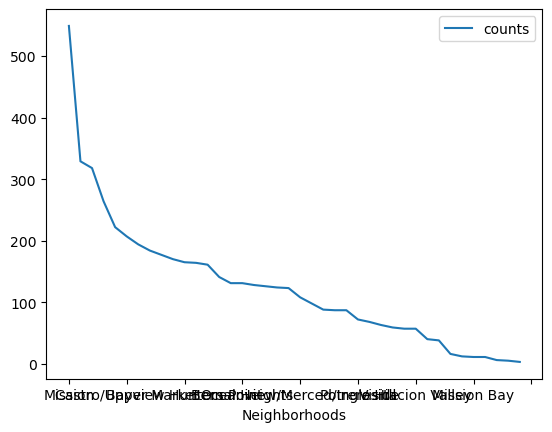

In [5]:
neighborhood_counts.plot('Neighborhoods', 'counts')

<BarContainer object of 40 artists>

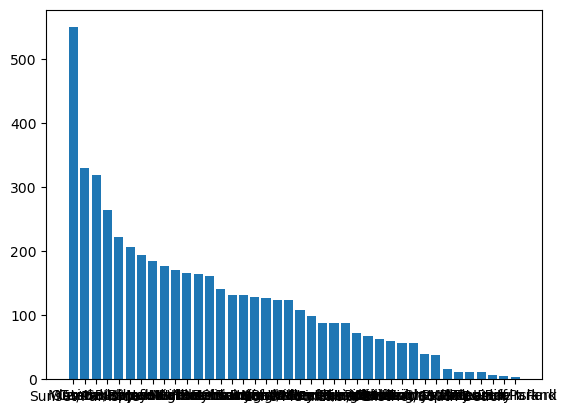

In [6]:
neighs = list(neighborhood_counts["Neighborhoods"])
counts = list(neighborhood_counts["counts"])
plt.bar(neighs, counts)

In [7]:
nuisances = sampled[['Nuisance']]

In [8]:
reasons = sampled.iloc[:, 3:11]
reasons

,Non Payment,Nuisance,Illegal Use,Unapproved Subtenant,Demolition,Ellis Act WithDrawal,Late Payments,Failure to Sign Renewal
81273,False,False,False,False,False,False,False,False
36572,False,False,False,False,False,False,False,False
66734,False,False,False,False,True,False,False,False
3039,False,False,False,False,True,False,False,False
152401,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
25503,False,True,False,False,False,False,False,False
120531,False,False,False,False,False,False,False,False
78792,False,False,False,False,False,False,False,False
113814,False,False,False,False,False,False,True,False


   Non Payment  counts
0        False    4656
1         True     344
   Nuisance  counts
0     False    4093
1      True     907
   Illegal Use  counts
0        False    4891
1         True     109
   Unapproved Subtenant  counts
0                 False    4894
1                  True     106
   Demolition  counts
0       False    4857
1        True     143
   Ellis Act WithDrawal  counts
0                 False    4537
1                  True     463
   Late Payments  counts
0          False    4820
1           True     180
   Failure to Sign Renewal  counts
0                    False    4987
1                     True      13
13


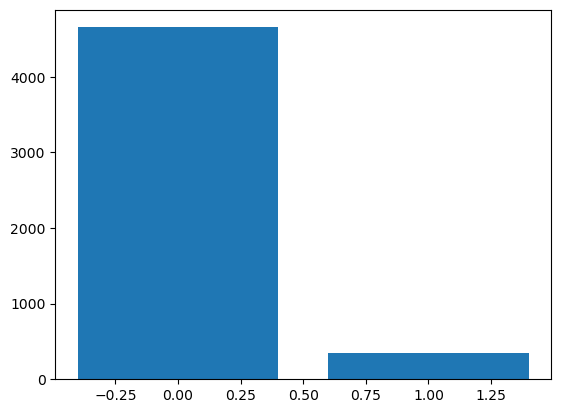

In [109]:
for col in reasons.columns:
    print(sampled[[col]].value_counts().reset_index(name='counts'))

###plot true and false for one column###
payment_ocurr = reasons[['Non Payment']].value_counts().reset_index(name='counts')
payment_ocurr

pay_bool = list(payment_ocurr['Non Payment'])
pay_counts = list(payment_ocurr['counts'])
plt.bar(pay_bool, pay_counts)

#create dataframe with true and false occurrences, maybe make this one of the tests#
columnNames = reasons.columns

for i in reasons.columns:
    true_occurrences = reasons[i].sum()
    false_occurrences = len(reasons) - true_occurrences

data = {"True": true_occurrences, "False": false_occurrences}
combined = pd.DataFrame(data, columnNames)
print(true_occurrences)

In [153]:
columnNames = reasons.columns


for col in columnNames:
    trues = reasons[col].sum()
    falses = len(reasons) - trues
    lst1 = [trues]
    lst2 = [falses]
    print(lst1, lst2)

[344] [4656]
[907] [4093]
[109] [4891]
[106] [4894]
[143] [4857]
[463] [4537]
[180] [4820]
[13] [4987]
